# Transfer function comparison for different pulse shapes

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import sensitivity_toolbox as st

We define the top rabi frequency and interferometer time T

We also define three configuration dicts holding a pulse type and pulse settings for the interferometer.

In [3]:
rabi_max = 2*np.pi*100
T = 100e-3

configs = []
configs.append(dict(label='Square', pulses_cfg=[(st.pulses.SquarePulse, dict())]))
configs.append(dict(label='Gaussian', pulses_cfg=[(st.pulses.GaussianPulse, dict(n=6))]))
configs.append(dict(label='GSinc', pulses_cfg=[(st.pulses.GSincPulse, dict(n=6, r=0.2))]))

Then for each configuration we plot the rabi frequency, the sensitivity and the transfer function.

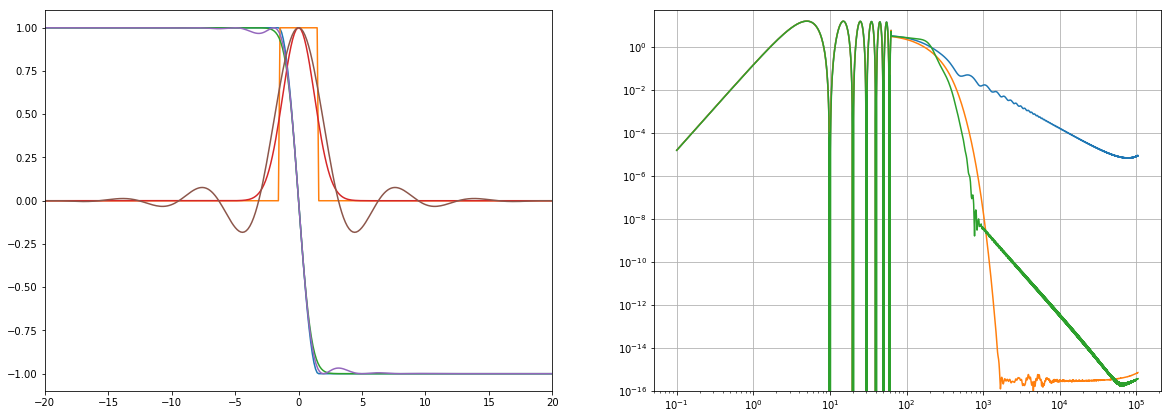

In [4]:
_, (ax_sensitivity, ax_transfer) = plt.subplots(1, 2, figsize=(20, 7))

for config in configs:
    gravi = st.interferometers.Gravimeter(rabi_max=rabi_max, T=T,
                                          pulses_cfg=config['pulses_cfg'])
    times = np.linspace(gravi.begin, gravi.end, 1000)
    offset_times = times - 0.5*(gravi.begin + gravi.end)
    
    rabi = gravi.rabi_fun(times)
    sensitivity = gravi.sensitivity_fun(times)
    freqs, H = gravi.transfer_function(F_max=1e5, df=0.1,
                                       average=True, f_cut=rabi_max/10, f_stride=10)
    
    ax_sensitivity.plot(offset_times*rabi_max, sensitivity/sensitivity.max(),
                        label=config['label'])
    ax_sensitivity.plot(offset_times*rabi_max, rabi/rabi.max(),
                        label=config['label'])
    ax_transfer.loglog(freqs, H**2, label=config['label'])
    
ax_sensitivity.set_xlim(-20, 20)
ax_transfer.set_ylim(1e-16, 50)
ax_transfer.grid()
plt.show()